# Student Information
* Name: 劉田元
* Student ID:110062328
* GitHub ID: SheridanM551
* Kaggle name: 110062328
* Kaggle private scoreboard snashot: 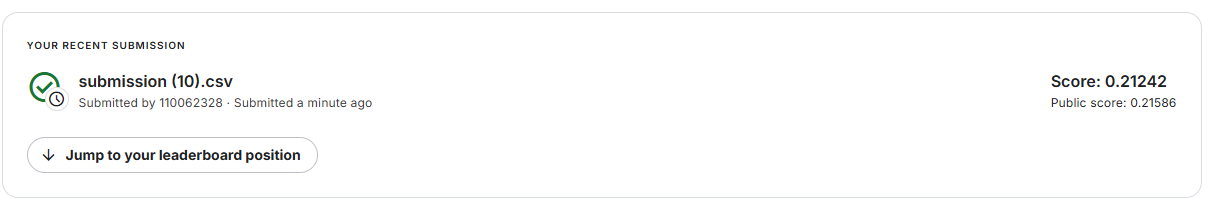

# Merge Data
- parse json, remove unrelated information
- merge all training/test data into df_train/df_test
- output: df_train.csv, df_test.csv

In [6]:
import pandas as pd
df_id = pd.read_csv("data_identification.csv")
df_emotion = pd.read_csv("emotion.csv")
df_sampleSub = pd.read_csv("sampleSubmission.csv")

import json

# 打開文件並逐行讀取
with open('tweets_DM.json', 'r') as file:
    data = []
    for line in file:
        data.append(json.loads(line))

# 確認讀取的結果
print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
import csv
csv_file = 'tweets_sentiment.csv'
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # 寫入標題行
    writer.writerow(['tweet_id', 'text', 'hashtags'])
    
    # 寫入資料行
    for entry in data:
        tweet = entry['_source']['tweet']
        writer.writerow([tweet['tweet_id'], tweet['text'], ', '.join(tweet['hashtags'])])

print(f"資料已成功存儲至 {csv_file}")

資料已成功存儲至 tweets_sentiment.csv


In [8]:
df = pd.read_csv("tweets_sentiment.csv")
df.head()

,tweet_id,text,hashtags
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",Snapchat
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","freepress, TrumpLegacy, CNN"
2,0x28b412,"Confident of your obedience, I write to you, k...",bibleverse
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,NaN
4,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN


In [9]:
df_train = df_id[df_id['identification'] == 'train'].drop(['identification'], axis=1).merge(df_emotion, on='tweet_id', how='outer').merge(df, on='tweet_id', how='inner')
display(df_train.head())
display(df_train['emotion'].unique())
display(len(df_id[df_id['identification'] == 'train']) == len(df_train))

,tweet_id,emotion,text,hashtags
0,0x1c7f10,joy,o m g Shut Up And Dance though #BlackMirror <LH>,BlackMirror
1,0x1c7f11,anticipation,On #twitch <LH> on the #Destinybeta #Destiny #...,"twitch, Destinybeta, Destiny, Destiny2, Destin..."
2,0x1c7f14,joy,A nice sunny wak this morning not many <LH> ar...,NaN
3,0x1c7f15,joy,I'm one of those people who love candy corn......,"Confession, NationalCandyCornDay, CouldEatThem..."
4,0x1c7f16,disgust,@metmuseum What are these? They look like some...,NaN


array(['joy', 'anticipation', 'disgust', 'trust', 'sadness', 'fear',
       'anger', 'surprise'], dtype=object)

True

In [10]:
df_test = df_id[df_id['identification'] == 'test'].drop(['identification'], axis=1).merge(df, on='tweet_id', how='inner')
display(df_test.head())
display(len(df_id[df_id['identification'] == 'test']) == len(df_test))


,tweet_id,text,hashtags
0,0x28cc61,@Habbo I've seen two separate colours of the e...,NaN
1,0x2db41f,@FoxNews @KellyannePolls No serious self respe...,NaN
2,0x2466f6,"Looking for a new car, and it says 1 lady owne...",womendrivers
3,0x23f9e9,@cineworld “only the brave” just out and fount...,robbingmembers
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...,NaN


True

In [11]:
df_train.to_pickle("/tmp/df_train.pkl")
df_test.to_pickle("/tmp/df_test.pkl")

# Text Preprocess (Feature extraction)
- converse text into dense representation(embedding)
- converse hashtags into one-hot encoding

In [13]:
import pandas as pd
df_train = pd.read_pickle("/tmp/df_train.pkl")
df_test = pd.read_pickle("/tmp/df_test.pkl")
display(df_train.head(20))

,tweet_id,emotion,text,hashtags
0,0x1c7f10,joy,o m g Shut Up And Dance though #BlackMirror <LH>,BlackMirror
1,0x1c7f11,anticipation,On #twitch <LH> on the #Destinybeta #Destiny #...,"twitch, Destinybeta, Destiny, Destiny2, Destin..."
2,0x1c7f14,joy,A nice sunny wak this morning not many <LH> ar...,NaN
3,0x1c7f15,joy,I'm one of those people who love candy corn......,"Confession, NationalCandyCornDay, CouldEatThem..."
4,0x1c7f16,disgust,@metmuseum What are these? They look like some...,NaN
5,0x1c7f19,anticipation,Postive thinking is the only way to go followe...,"LawOfAttraction, ask, receive, dreambig"
6,0x1c7f1a,joy,Best Check I’ve had this year <LH> 👀🙏🙏,NaN
7,0x1c7f1b,anticipation,Have not eaten since yesterday <LH>,NaN
8,0x1c7f1c,trust,Glad to know that Ahmedabad has been declared ...,World
9,0x1c7f1d,joy,"John 15:9 As the Father has loved me, so have ...",scriptureverse


## how to deal with text
- note that hashtags are already in text, I process them together

In [13]:
# observe some samples
print("\n".join([i for i in df_train['text'][:100].to_list()]))

NameError: name 'df_train' is not defined

In [14]:
# 實驗：表情符號需要留空格才能正確被tokenize，原本這種@@是設計給 I've => 'I@@', '’@@', 've'， BPE (Byte Pair Encoding) 技術，
# 這種分詞方式是 BERT 模型（包括 bertweet-base）設計的核心部分，旨在有效處理不常見詞彙以及縮寫等特殊語言現象。但不適用於表情符號。

from transformers import AutoTokenizer

# 加載 BERTweet 的分詞器
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# 測試帶表情符號的文本
text = "I love candy corn 😁😂 and Halloween 🎃  👻 < USER > !!  I’ve  lol wtf"
tokens = tokenizer.tokenize(text)

print("Original Text:", text)
print("Tokenized Output:", tokens)
import regex

def add_spaces_around_emojis(text):
    # 匹配所有表情符號並在其前後加空格
    emoji_pattern = regex.compile(r'(\p{Emoji})', flags=regex.UNICODE)
    return emoji_pattern.sub(r' \1 ', text)
    
text = "I love candy corn 😁😂 and Halloween 🎃👻"
processed_text = add_spaces_around_emojis(text)
print("Processed Text:", processed_text)
tokens = tokenizer.tokenize(processed_text)
print("Tokenized Output:", tokens)

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Original Text: I love candy corn 😁😂 and Halloween 🎃  👻 < USER > !!  I’ve  lol wtf
Tokenized Output: ['I', 'love', 'candy', 'corn', '😁@@', '😂', 'and', 'Halloween', '🎃', '👻', '<', 'USER', '>', '!@@', '!', 'I@@', '’@@', 've', 'lol', 'wtf']
Processed Text: I love candy corn  😁  😂  and Halloween  🎃  👻 
Tokenized Output: ['I', 'love', 'candy', 'corn', '😁', '😂', 'and', 'Halloween', '🎃', '👻']


In [17]:
from tqdm import tqdm
import re, regex
tqdm.pandas()
def preprocess_text(text):
    # 1. 替換 <LH> 為 "light-hearted"
    text = text.replace("<LH>", "light-hearted")

    # 2. 刪除 URL 和 @user
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # 刪除 URL
    text = re.sub(r"@\w+", "", text)  # 刪除 @user

    # 3. 移除標籤的 `#` 符號，但保留關鍵字
    text = re.sub(r"#(\w+)", r" \1", text)

    # 4. 在表情符號前後添加空格
    emoji_pattern = regex.compile(r'(\p{Emoji})', flags=regex.UNICODE)
    text = emoji_pattern.sub(r' \1 ', text)

    # 5. 簡化重複標點（如 "!!!" -> "!")
    text = re.sub(r"([.!?])\1+", r"\1", text)

    # 6. 移除多餘空格
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df_train['clean_text'] = df_train['text'].progress_apply(lambda x : preprocess_text(x))
df_test['clean_text'] = df_test['text'].progress_apply(lambda x : preprocess_text(x))


  0%|          | 0/1455563 [00:00<?, ?it/s]

  0%|          | 0/411972 [00:00<?, ?it/s]

In [18]:
sampled_data = df_train.sample(20, random_state=42)[['text', 'clean_text']]
for index, row in sampled_data.iterrows():
    print(row['text'])
    print(row['clean_text'])
    print()

Do I have to be an adult today 😭😷 <LH> #cantevenmanagefood erghhhhh
Do I have to be an adult today 😭 😷 light-hearted cantevenmanagefood erghhhhh

@DavidHaydnJones I got a call from casting agency. And I'm  so excited to be shooting a scene tomorrow on the Show Hawaii 5-0!!! 😀🏝#Blessed
I got a call from casting agency. And I'm so excited to be shooting a scene tomorrow on the Show Hawaii 5 - 0 ! 😀 🏝 Blessed

@Skyler23 @DavidSchechter if my screen was that dirty i would flip out... <LH>
if my screen was that dirty i would flip out. light-hearted

How good are birthdays? It’s a day of people telling you nice things and giving you presents <LH>
How good are birthdays? It’s a day of people telling you nice things and giving you presents light-hearted

Excuse me can I talk to you for a moment?waits for response. Girl ask boy same q again. No response. Girl spills guts. Boy. No response.#wtf
Excuse me can I talk to you for a moment?waits for response. Girl ask boy same q again. No response. G

In [19]:
df_train.drop(['hashtags'], axis=1, inplace = True)
df_test.drop(['hashtags'], axis=1, inplace = True)
df_train.to_pickle("df_train_clean.pkl")
df_test.to_pickle("df_test_clean.pkl")

# Tokenize & get embeddings

In [2]:
import pandas as pd
df_train = pd.read_pickle("df_train_clean.pkl")
df_test = pd.read_pickle("df_test_clean.pkl")
display(df_train.head(20))
display(df_test.head(20))

,tweet_id,emotion,text,clean_text
0,0x1c7f10,joy,o m g Shut Up And Dance though #BlackMirror <LH>,o m g Shut Up And Dance though BlackMirror lig...
1,0x1c7f11,anticipation,On #twitch <LH> on the #Destinybeta #Destiny #...,On twitch light-hearted on the Destinybeta Des...
2,0x1c7f14,joy,A nice sunny wak this morning not many <LH> ar...,A nice sunny wak this morning not many light-h...
3,0x1c7f15,joy,I'm one of those people who love candy corn......,I'm one of those people who love candy corn. a...
4,0x1c7f16,disgust,@metmuseum What are these? They look like some...,What are these? They look like something toddl...
5,0x1c7f19,anticipation,Postive thinking is the only way to go followe...,Postive thinking is the only way to go followe...
6,0x1c7f1a,joy,Best Check I’ve had this year <LH> 👀🙏🙏,Best Check I’ve had this year light-hearted 👀 🙏 🙏
7,0x1c7f1b,anticipation,Have not eaten since yesterday <LH>,Have not eaten since yesterday light-hearted
8,0x1c7f1c,trust,Glad to know that Ahmedabad has been declared ...,Glad to know that Ahmedabad has been declared ...
9,0x1c7f1d,joy,"John 15:9 As the Father has loved me, so have ...","John 1 5 : 9 As the Father has loved me, so ha..."


,tweet_id,text,clean_text
0,0x28cc61,@Habbo I've seen two separate colours of the e...,I've seen two separate colours of the elegant ...
1,0x2db41f,@FoxNews @KellyannePolls No serious self respe...,No serious self respecting individual believes...
2,0x2466f6,"Looking for a new car, and it says 1 lady owne...","Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,@cineworld “only the brave” just out and fount...,“only the brave” just out and fountain park ha...
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...,Felt like total dog 💩 going into open gym and ...
5,0x2f77fe,#RYSENSHYNE @nydjlive plz ply me ne woa @man...,RYSENSHYNE plz ply me ne woa ft to the birthda...
6,0x3101fd,"I am thankful for my husband, family, furry b...","I am thankful for my husband, family, furry ba..."
7,0x1e1f33,I have dreams but then there are dreams that f...,I have dreams but then there are dreams that f...
8,0x1f32bd,Fuck you @JoelOsteen God will judge you for yo...,Fuck you God will judge you for your greed. li...
9,0x32e0c3,Pretty sure he was safe...just because the thr...,Pretty sure he was safe.just because the throw...


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
from tqdm import tqdm

# 加載模型和分詞器
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")
model = AutoModel.from_pretrained("vinai/bertweet-base")

# 使用 GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# 將文本轉換為向量的函數
def text_to_vector(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    return cls_embedding.cpu().numpy()

# 將向量展平成多列的函數
def vector_to_columns(df, vector_column_name='vector'):
    vector_df = pd.DataFrame(df[vector_column_name].tolist(), index=df.index)
    vector_df.columns = [f'vec_{i}' for i in range(vector_df.shape[1])]
    return pd.concat([df.drop(columns=[vector_column_name]), vector_df], axis=1)

# 批量處理函數
def process_in_batches(df, batch_size, tokenizer, model, device, output_file, resume_idx=0):
    tqdm.pandas()
    # 如果有進度檔案，則載入並合併已處理的部分
    if resume_idx > 0 and pd.io.common.file_exists(output_file):
        processed_dfs = [pd.read_pickle(output_file)]
        print(f"Resuming from batch {resume_idx}. Previously processed data loaded.")
    else:
        processed_dfs = []

    # 從指定的批次開始處理
    for start_idx in tqdm(range(resume_idx, len(df), batch_size), desc="Processing batches"):
        end_idx = start_idx + batch_size
        batch = df.iloc[start_idx:end_idx].copy()

        # 將文本轉換為向量
        batch['vector'] = batch['clean_text'].progress_apply(lambda x: text_to_vector(x, tokenizer, model, device))
        batch = vector_to_columns(batch, vector_column_name='vector')

        # 添加處理結果
        processed_dfs.append(batch)

        # 保存中間結果
        pd.concat(processed_dfs).to_pickle(output_file)

    # 返回最終結果
    return pd.concat(processed_dfs)

# 處理訓練集
# df_train_rawtext2vec = process_in_batches(
#     df_train.copy(),
#     batch_size=100000,
#     tokenizer=tokenizer,
#     model=model,
#     device=device,
#     output_file="df_train_text2vec.pkl"
# )
# print("Final train shape:", df_train_rawtext2vec.shape)

# 處理測試集（若需要）
print(f"target shape{df_test.shape}")
df_test_rawtext2vec = process_in_batches(
    df_test[200000:255481].copy(),
    batch_size=100000,
    tokenizer=tokenizer,
    model=model,
    device=device,
    output_file="df_test_text2vec3.pkl",
)
print("Final test shape:", df_test_rawtext2vec.shape)


target shape(411972, 3)


Processing batches: 100%|██████████| 1/1 [06:31<00:00, 391.25s/it]

Final test shape: (55481, 771)


In [6]:
import pandas as pd
df_train_rawtext2vec = pd.read_pickle("df_train_text2vec.pkl")
df_test_rawtext2vec = pd.read_pickle("df_test_text2vec_combined.pkl")
print(df_train_rawtext2vec.shape)
print(df_test_rawtext2vec.shape)


(1455563, 772)
(411972, 771)


In [24]:
df_train_rawtext2vec.head()

,tweet_id,emotion,text,clean_text,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,...,vec_758,vec_759,vec_760,vec_761,vec_762,vec_763,vec_764,vec_765,vec_766,vec_767
0,0x1c7f10,joy,o m g Shut Up And Dance though #BlackMirror <LH>,o m g Shut Up And Dance though BlackMirror lig...,0.041406,0.352953,0.128063,-0.124721,0.131426,-0.128531,...,0.111117,0.061408,-0.044386,0.066313,0.086901,0.025037,0.072857,-0.119849,-0.073777,-0.105223
1,0x1c7f11,anticipation,On #twitch <LH> on the #Destinybeta #Destiny #...,On twitch light-hearted on the Destinybeta Des...,-0.153225,0.068488,0.040499,-0.071697,0.081116,-0.202943,...,-0.055095,0.148799,0.076692,0.065750,-0.096566,-0.004644,0.007017,-0.231414,0.085717,-0.240784
2,0x1c7f14,joy,A nice sunny wak this morning not many <LH> ar...,A nice sunny wak this morning not many light-h...,-0.159677,0.021583,-0.140240,-0.134631,-0.012749,-0.146594,...,-0.005338,0.007081,0.100957,0.061555,0.016798,-0.173768,0.155298,0.027333,-0.091883,-0.086600
3,0x1c7f15,joy,I'm one of those people who love candy corn......,I'm one of those people who love candy corn. a...,-0.047067,0.202339,-0.048930,-0.155279,0.098330,-0.100794,...,0.058340,-0.018367,0.031577,0.039944,0.046654,-0.016262,0.284357,-0.078280,0.143863,-0.081622
4,0x1c7f16,disgust,@metmuseum What are these? They look like some...,What are these? They look like something toddl...,-0.077914,0.203950,-0.024378,-0.173889,0.024343,0.003794,...,0.000733,0.086306,0.067361,0.103379,0.197371,-0.001880,0.190982,-0.098945,0.077245,0.103532


# training


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 假設 df_train_rawtext2vec 已經載入並且格式正確
df = df_train_rawtext2vec

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 編碼 'emotion' 列
df['encoded_emotion'] = label_encoder.fit_transform(df['emotion'])

# 查看編碼對應
print("Emotion Mapping:", dict(enumerate(label_encoder.classes_)))

# 特徵與標籤
X = df.drop(['encoded_emotion', 'emotion', 'clean_text', 'text', 'tweet_id'], axis=1)
y = df['encoded_emotion']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 XGBClassifier 模型
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.001,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',  # 避免警告信息
    tree_method = "hist", device = "cuda"
)

# 訓練模型
xgb_model.fit(X_train, y_train)

# 預測
y_pred = xgb_model.predict(X_test)

# 評估結果
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Emotion Mapping: {0: 'anger', 1: 'anticipation', 2: 'disgust', 3: 'fear', 4: 'joy', 5: 'sadness', 6: 'surprise', 7: 'trust'}


/home/hsnl-iot/anaconda3/envs/110062328/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [22:38:18] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4121
Classification Report:
              precision    recall  f1-score   support

       anger       0.99      0.05      0.09      8062
anticipation       0.70      0.28      0.40     50129
     disgust       0.42      0.05      0.09     27789
        fear       1.00      0.00      0.01     12679
         joy       0.38      0.97      0.55    102986
     sadness       0.59      0.07      0.12     38793
    surprise       1.00      0.04      0.07      9790
       trust       0.91      0.05      0.09     40885

    accuracy                           0.41    291113
   macro avg       0.75      0.19      0.18    291113
weighted avg       0.61      0.41      0.30    291113



# Predict

In [8]:
# 假設 df_test_rawtext2vec 已經載入
df_test = df_test_rawtext2vec.copy()

# 確保 df_test 的欄位與訓練數據的特徵欄位一致
X_test_data = df_test.drop(['clean_text', 'text', 'tweet_id'], axis=1, errors='ignore')

# 確保預測欄位數與訓練數據一致
X_test_data = X_test_data[X.columns]  # 僅選擇訓練時的特徵欄位

# 使用模型進行預測
df_test['predicted_emotion'] = xgb_model.predict(X_test_data)

# 將預測結果轉換回原始標籤
df_test['predicted_emotion_label'] = label_encoder.inverse_transform(df_test['predicted_emotion'])

# 顯示預測結果合併後的數據框
print(df_test[['tweet_id', 'predicted_emotion_label']].head())

# 如果需要保存結果
# df_test.to_pickle("df_test_with_predictions.pkl")


   tweet_id  predicted_emotion predicted_emotion_label
0  0x28cc61                  4                     joy
1  0x2db41f                  4                     joy
2  0x2466f6                  4                     joy
3  0x23f9e9                  4                     joy
4  0x1fb4e1                  4                     joy


In [34]:
df_sub = df_test[['tweet_id', 'predicted_emotion_label']]
df_sub.columns = ['id', 'emotion']
df_sampleSub = pd.read_csv("sampleSubmission.csv")
df_sampleSub.drop(['emotion'],axis=1,inplace=True)
df_sampleSub = pd.merge(df_sampleSub, df_sub, on='id', how='inner')
df_sampleSub.head()
df_sampleSub.to_csv("submission.csv", index=0)